<a href="https://colab.research.google.com/github/Aarya718/Cognifyz-Technologies-/blob/main/RestaurantRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Aarya Ramchandra Tarphe

Batch - February 2025

Position - Machine Learning Intern

Task-2 : Restaurant Recommendation

Objective: Create a restaurant recommendation
system based on user preferences.

# Installing Modules and Packages

In [2]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505171 sha256=bd4f3fc00e3d0474eae557299250462e1a6baabb32e8e6ecec7e3511fc706474
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


# Importing Python Libraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy


# Loading the Dataset

In [5]:
df = pd.read_csv("/content/Dataset .csv")

# Using functions to view the dataset

In [7]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


# Data Cleaning

In [21]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)
df['Price range'].fillna(df['Price range'].mode()[0], inplace=True)
df['Aggregate rating'].fillna(df['Aggregate rating'].median(), inplace=True)
df['Votes'].fillna(0, inplace=True)


<ipython-input-21-d4e1149f566a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)
<ipython-input-21-d4e1149f566a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [22]:
le = LabelEncoder()
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = le.fit_transform(df['Is delivering now'])
df['Rating text'] = le.fit_transform(df['Rating text'])


In [23]:
scaler = StandardScaler()
df[['Average Cost for two', 'Votes', 'Aggregate rating']] = scaler.fit_transform(df[['Average Cost for two', 'Votes', 'Aggregate rating']])

# Data Visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

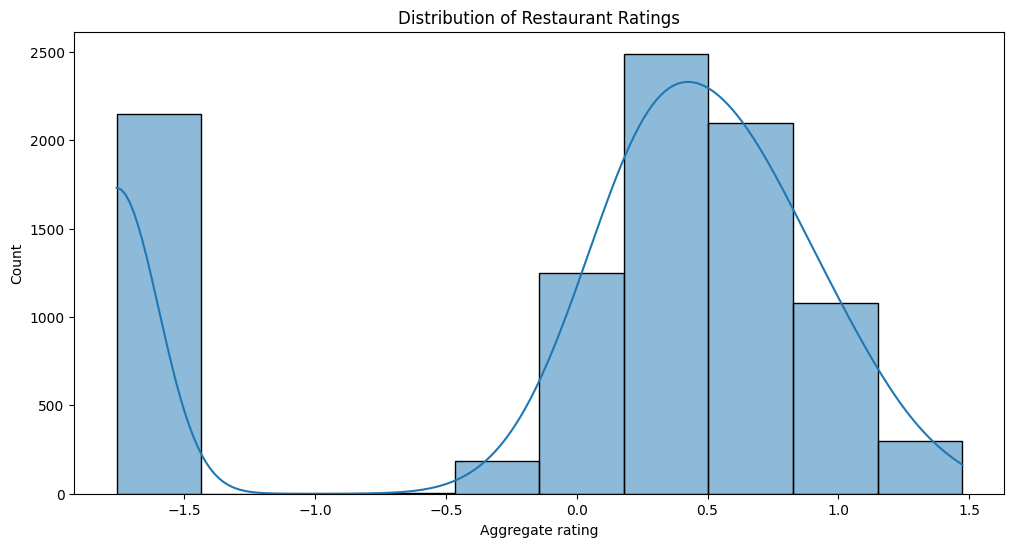

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.show()

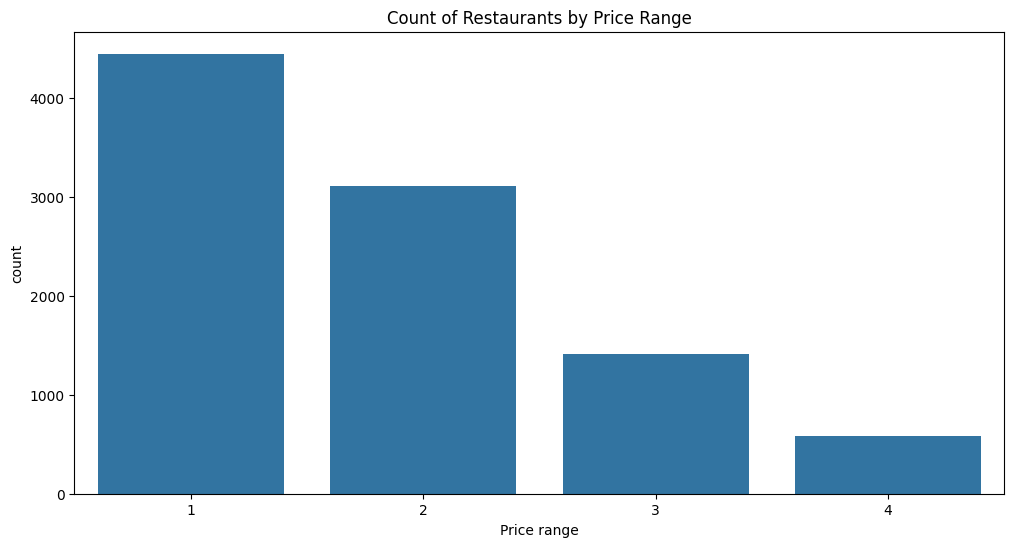

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', data=df)
plt.title('Count of Restaurants by Price Range')
plt.show()

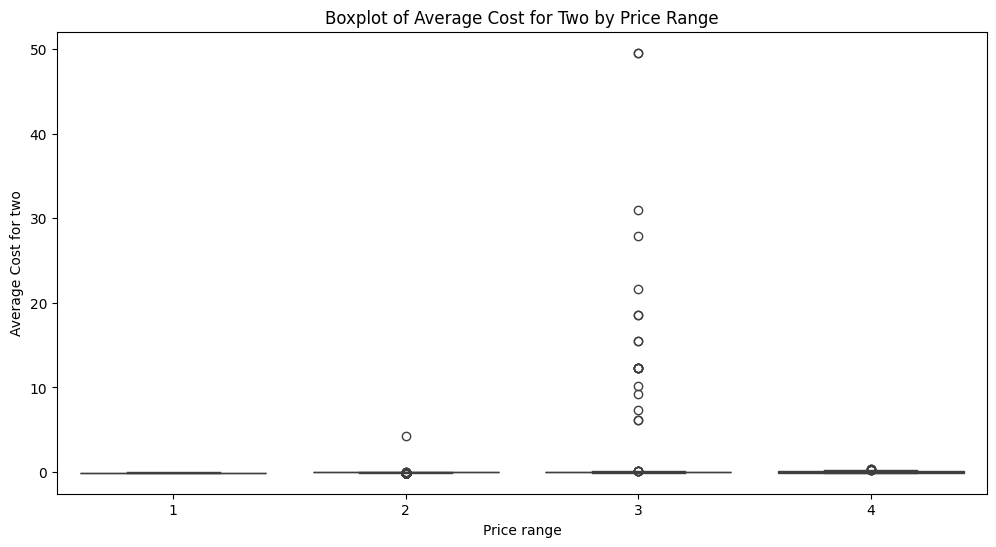

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price range', y='Average Cost for two', data=df)
plt.title('Boxplot of Average Cost for Two by Price Range')
plt.show()

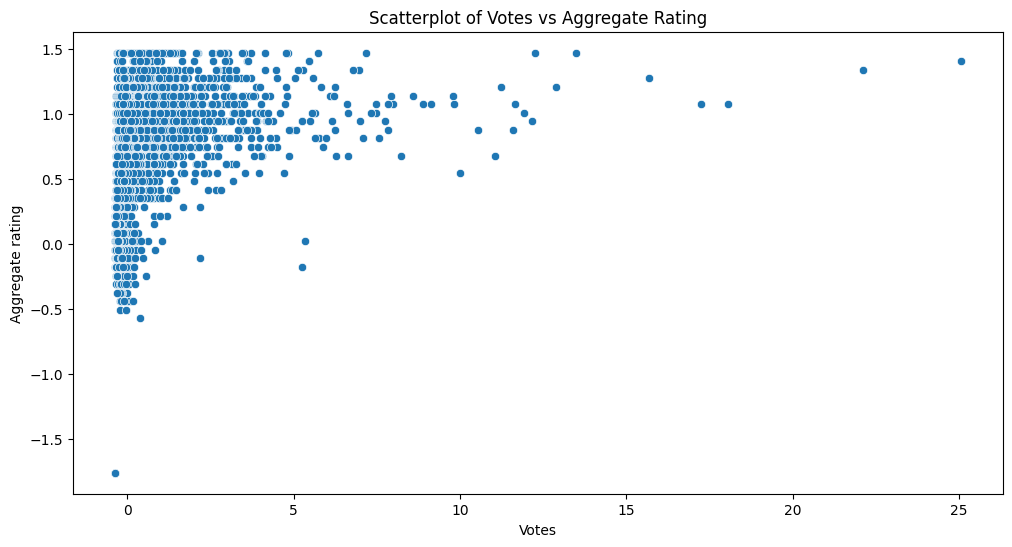

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Scatterplot of Votes vs Aggregate Rating')
plt.show()


# Feature Engineering

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [34]:
vectorizer = TfidfVectorizer()
cuisine_matrix = vectorizer.fit_transform(df['Cuisines'])

# Recommendation System Model

In [35]:
similarity_matrix = cosine_similarity(cuisine_matrix)

In [36]:
def recommend_restaurants(user_cuisine, user_price_range, top_n=5):
    user_cuisine_vector = vectorizer.transform([user_cuisine])
    similarities = cosine_similarity(user_cuisine_vector, cuisine_matrix).flatten()
    df['Similarity Score'] = similarities
    recommendations = df[df['Price range'] == user_price_range].sort_values(by='Similarity Score', ascending=False).head(top_n)
    return recommendations[['Restaurant Name', 'Cuisines', 'Price range', 'Aggregate rating']]

In [38]:
user_cuisine = "Italian"
user_price_range = 2
recommendations = recommend_restaurants(user_cuisine, user_price_range)
print(recommendations)

         Restaurant Name Cuisines  Price range  Aggregate rating
233   Trattoria Tiramisu  Italian            2          0.945480
3705           Sinyora's  Italian            2          0.879530
1106       Da Pizza Zone  Italian            2         -1.758473
9414           San Carlo  Italian            2          1.077380
2070           56 Fresca  Italian            2          0.681680


# Conclusion

Hence Restaurant Recommendation System model is build successfully using Python.